## 사이킷런 LinearRegression 클래스
- LinearRegression 클래스
    - class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_nobs=1)
    - fit_intercept : 절편(y절편, bias)

- LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화 하는 OLS(Ordinary Least Squares) 추정 방식으로

  구현한 클래스임.

- LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장함. 절편은 intercept_

## 선형 회귀의 다중 공선성 문제
- 일반적으로 선형 회귀는 입력 피처의 독립성에 많은 영향을 받음. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해 짐.

- 이러한 현상을 다중 공선성(multi-collinearity) 문제라고 함.

- 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용함.


## 회귀 평가 지표
- MAE : Mean Absolute Error이며 실제값과 예측값의 차이를 절대값으로 반환해 평균한 것임.
    - $$ MAE = \frac{1}{n}\sum_{i=1}^n|Y_i - \hat{Y}|$$

- MSE : Mean Squared Error이며 실제값과 예측값의 차이를 제곱해 평균한 것
    - $$ MSE = \frac{1}{n}\sum_{i=1}^n(Y_i - \hat{Y})^2$$    

- MSLE : MSE에 로그를 적용한 것임. 결정값이 클 수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줌.
    - $$ MSLE = \frac{1}{n}\sum_{i=1}^n(\log(Y_i + 1) - \log(\hat{Y}_i + 1))^2$$    

- RMSE : Root Mean Squared Error 임. MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로  MSE에 루트를 씌운 것임.
    - $$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(Y_i - \hat{Y})^2}$$    

- RMSLE : RMSE에 로그를 적용한 것. 결정값이 클 수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줌.
    - $$ MSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\log(Y_i + 1) - \log(\hat{Y}_i + 1))^2}$$    

- R^2 : 분산 기반으로 예측 선능을 평가함. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울 수록 예측 정확도가 높음.
    - $$ R^2 = \frac{예측값 Variance}{실제값 Variance}$$

<img src="../images/평가지표.png" width="500px" height="300px" title="회귀평가지표"></img>

- MAE에 비해 RMSE는 큰 오류값에 상대적인 페널티를 더 부여함.

    - 예를 들어 다섯개의 오류값(실제값과 예측값의 차이)이 10, 20, 10, 10, 100 과 같이 다른 값에 비해 큰 오류값이 존재하는 경우

      RMSE는 전반적으로 MAE 보다 높음

        - $$MAE = (10 + 20 + 10 + 10 +100) / 5 = 30\; 이고 \; RMSE = \sqrt{(100 + 400 + 100 + 100 +10000) / 5} = \sqrt{2140} = 46.26$$ 

    - 이처럼 상대적으로 더 큰 오류값이 있을 때 이에 대한 페널티를 더 부과하는 평가 방식이 RMSE임.

## 사이킷런 회귀 평가 API
- 다음은 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용값임.

    - 평가방법 | 사이킷런 평가 지표 API | Scoring 함수 적용 값
    - MAE     | metrics.mean_absolute_error | 'neg_mean_absolute_error'
    - MSE     | metrics.mean_squared_error | 'neg_mean_squared_error'
    - RMSE    | metrics.mean_squared_error 를 그대로 사용하되 squared 파라미터를 False로 설정 | 'neg_root_mean_squared_error'
    - RMLE    | metrics.mean_squared_log_error | 'neg_mean_squared_log_error'
    - R^2     | metrics.r2_score | 'r2'

- 과거 버전의 사이킷런은 RMSE를 계산하는 함수가 제공되지 않았지만, 0.22 버전부터는 RMSE를 위한 함수를 제공함. RMSE를 구하기 위해서는

- MSE를 위한 metrics.mean_squared_error() 함수를 그대로 사용하되, squared 파라미터를 False로 지정하여 사용함.

- metrics.mean_squared_error() 함수는 squared 파라미터가 기본적으로 True임. 

- 즉 MSE는 사이킷런에서 metrics.mean_squared_error(실제값, 예측값, squared=True)이며 

  RMSE는 metrics.mean_squared_error(실제값, 예측값, squared=False)를 이용해서 구함.


## 사이킷런 Scoring 함수에 회귀 평가 적용 시 유의 사항

- Cross_val_score, GridSearchCV와 같은 Scoring함수에 회귀 평가 지표를 적용시 유의사항
    - MAE 사이킷런 scoring 파라미터 값은 'neg_mean_absolute_error'임. 이는 Negative(음수) 값을 가진다는 의미인데, MAE는 절대값의 합이기 때문에
      음수가 될수 없음.
    
    - Scoring 함수에 'net_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로
      자동 평가하기 때문임. 따라서 -1을 원래의 평가 지표값에 곱해서 음수(Negative)를 만들어 작은 오류값이 더 큰 숫자로 인식하게 함
        - 예를 들면 10 > 1 이지만 음수를 곱하면 -1 > -10이 됨
    
    - metrics.mean_absolute_error()와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환함. 하지만 Scoring 함수의 
      scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()이니 주의가 필요 함.

## 다항회귀 개요(Polynomial Regression)
- 다항 회귀는 
$$ y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2$$
  와 같이 회귀식이 독립변수의 단항식이 아닌 2차식, 3차식과 같은 다항식으로 표현되는 것을 지칭함

- <img src="../images/다항회귀.jpg " width="500px" height="300px" title="다항회귀"></img>

  - 데이터 세트에 대해서 피처 X에 대해 Target Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현하는 것이 
    더 예측 성능이 높음.

## 선형 회귀와 비선형 회귀의 구분
- 선형 회귀
    - $$ y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 $$
    - $$ 새로운\; 변수인 \; Z를\; z = [x_1, x_2, x_1x_2, x_1^2, x_2^2]로\; 한다면 $$
    - $$ y = w_0 + w_1z_1 + w_2z_2 + w_3z_3 + w_4z_4 + w_5z_5 $$

- 비선형 회귀
    - $$ Y = w_1 * cos(X + w_4) + w_2 * cos(2*X + w_4) + w_3 $$
    - $$ Y = w_1 * X^{w_2} $$

- 다항 회귀는 선형회귀입니다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것인지
  독립변수의 선형/비선형 여부와는 무관함.

## 사이킷런에서의 다항 회귀
- 사이킷런은 다항회귀를 바로 API로 제공하지 않음
- 대신 PolynomialFeatures 클래스로 원본 단항 피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression 객체를 적용하여

  다항회귀 기능을 제공함.

- PolynomialFeatures : 원본 피처 데이터 세트를 기반으로 degree 차수에 따른 다항식을 적용하여 새로운 피처들을 생성하는 클래스
                       피처 엔지니어링의 기법중의 하나임.

- $$ 단항\; 피처\; [x_1, x_2]를\; Degree = 2,\; 즉\; 2차\; 다항\; 피처로\; 변환한다면? $$
  - $$(x_1 + x_2)^2의\; 식\; 전개에 대응되는\; [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]의\; 다항 피처들로 변환$$
    - $$ 1차 단항 피처들의 값이 [x_1, x_2] = [0\; 1] 일 경우$$
    - $$ 2차 다항 피처들의 값은 [1, x_1 = 0, x_2 = 1, x_1x_2 = 0, x_1^2 = 0, x_2^2 = 1] 형태인 [1, 0, 1, 0, 0, 1] 로 변환 $$
- $$ 단항\; 피처\; [x_1, x_2]를\; Degree = 3,\; 즉\; 3차\; 다항\; 피처로\; 변환한다면? $$    
  - $$(x_1 + x_2)^3의 식 전개에 대응되는 [1, x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]의 다항 피처들로 변환$$

- 사이킷런은 다항회귀를 바로 API로 제공하지 않음

- 대신 PolynomialFeatures 클래스로 원본 단항 피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression 객체를 적용하여 다항회귀 기능을 제공함.

- Polynomial Features 변환 --> LinearRegression 학습
  - $$단항 피처 [x_1, x_2]를 2차 다항 피처 [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]로 변경(degree=2로 가정)$$
  - PolynomalFeatures로 변환된 X 피처들을 LinearRegression 객체로 학습
  
- 사이킷런에서는 일반적으로 Pipeline 클래스를 이용하여 PolynomialFeatures 변환과 LinearRegression 학습/예측을 결합하여 다항 회귀를 구현함. 

## 5.3 Gradient Descent

**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

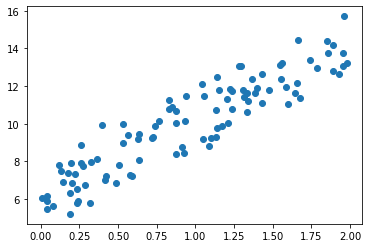

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)
plt.show()

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

### 경사하강법 수행 프로세스
![](./경사하강법_수행프로세스.png)

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함
![](./weight_update.png)

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)

(100, 1)
(1, 1) (1, 1)


**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


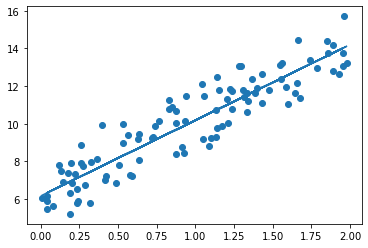

In [7]:
plt.scatter(X, y)
plt.plot(X,y_pred)

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
np.random.permutation(100)

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))
  

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
#warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bostonDF.head(20)

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

In [15]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


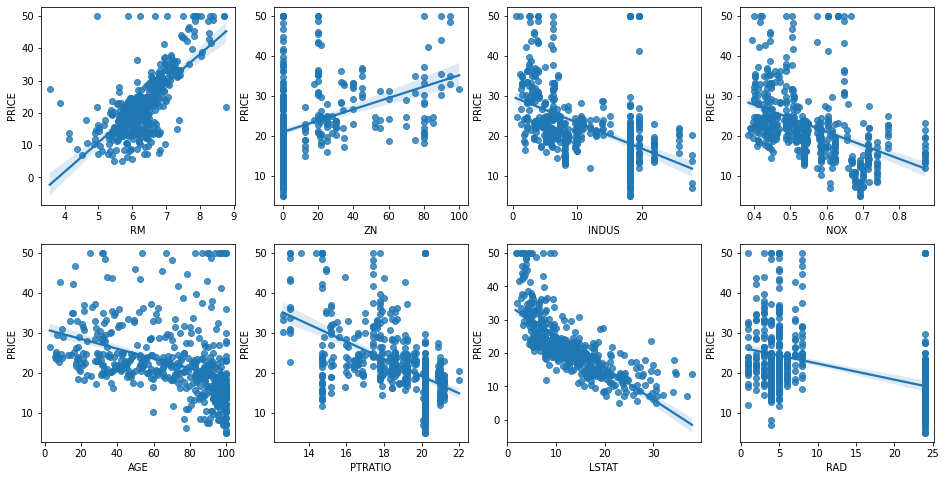

In [16]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [18]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [19]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [20]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 5-5. Polynomial Regression과 오버피팅/언더피팅 이해
### Polynomial Regression 이해

PolynomialFeatures 클래스로 다항식 변환

- $$ 1차 단항 피처들의 값이 [x_1, x_2] = [0\; 1] 일 경우$$
- $$ 2차 다항 피처들의 값은 [1, x_1 = 0, x_2 = 1, x_1x_2 = 0, x_1^2 = 0, x_2^2 = 1] 형태인 [1, 0, 1, 0, 0, 1] 로 변환 $$

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3 

In [22]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [23]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


**사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습**  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다. 

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 보스턴 주택가격 예측**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
#p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),                    
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 15.556 , RMSE : 3.944
Variance score : 0.782


In [30]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해
* 사이킷런의 아래 문서에서 예제를 차용함
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


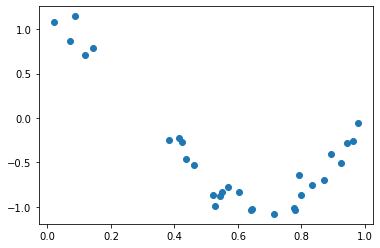

In [32]:
plt.scatter(X, y)

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()



## 5-6. Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

In [ ]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



**alpha 값에 따른 컬럼별 회귀계수 출력**

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

### 엘라스틱넷 회귀

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

### 선형 회귀 모델을 위한 데이터 변환

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)